In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def  Johnsons_Su_distribution(x):
    p = np.sqrt(2)/np.sqrt(np.pi * (1 + (x - 1) ** 2)) * np.exp(-0.5 * (3 + 2 * np.arcsinh(x - 1))**2)
    return p

def q_x(x): # Proposal distribution
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x ** 2)

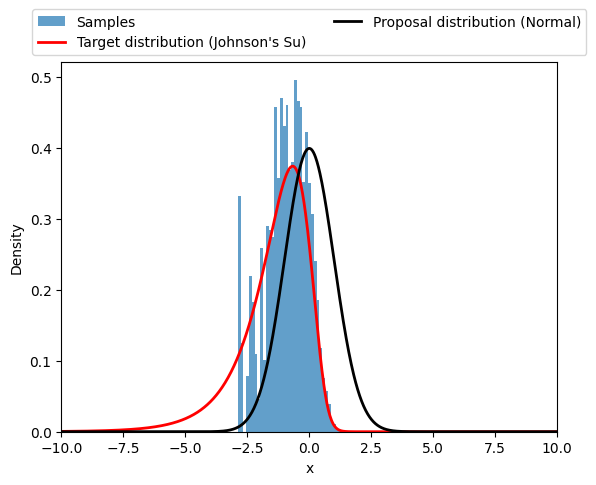

In [6]:
# Q1 and Q2
L = 1000 
seed = 4
np.random.seed(seed)

samples = np.random.normal(0, 1, L)

weights = Johnsons_Su_distribution(samples) / q_x(samples)

n_bins = 50
plt.hist(samples,weights=weights,bins=n_bins,density=True,alpha=0.7,label='Samples')

x = np.linspace(-10, 10, 1000)
plt.plot(x, Johnsons_Su_distribution(x), color = 'r',lw=2,label='Target distribution (Johnson\'s Su)')
plt.plot(x, q_x(x), color = 'k',lw=2,label='Proposal distribution (Normal)')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)
plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

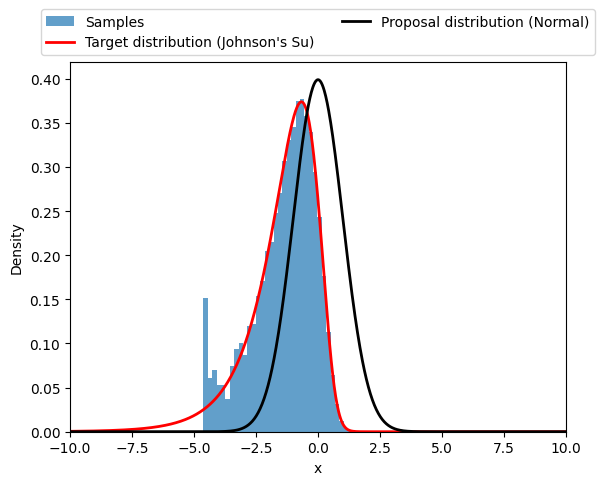

In [7]:
# Q3

L = 100000 #change sample size here

samples = np.random.normal(0, 1, L)

weights = Johnsons_Su_distribution(samples) / q_x(samples)
weights = weights / np.sum(weights)
n_bins = 50
plt.hist(samples,weights=weights,bins=n_bins,density=True,alpha=0.7,label='Samples')

x = np.linspace(-10, 10, 1000)
plt.plot(x, Johnsons_Su_distribution(x), color = 'r',lw=2,label='Target distribution (Johnson\'s Su)')
plt.plot(x, q_x(x), color = 'k',lw=2,label='Proposal distribution (Normal)')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)
plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

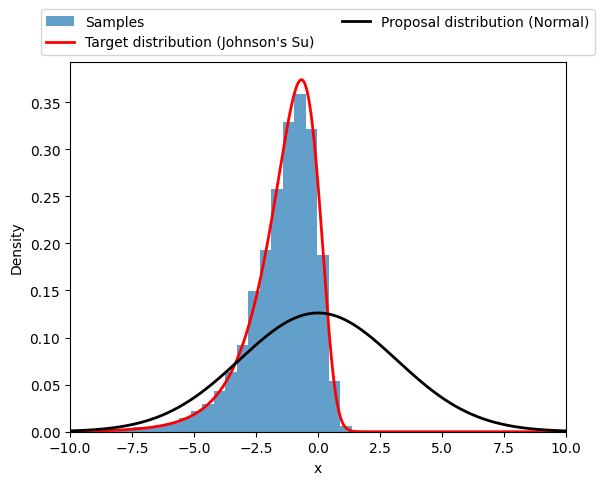

In [8]:
#Q4 

def q_x(x,mean,variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-0.5 * (x - mean) ** 2 / variance)

L = 10000 #change sample size here
mean = 0
variance = 10
std = np.sqrt(variance)
samples = np.random.normal(mean, std, L)

weights = Johnsons_Su_distribution(samples) / q_x(samples,mean,variance)
weights = weights / np.sum(weights)
n_bins = 50
plt.hist(samples,weights=weights,bins=n_bins,density=True,alpha=0.7,label='Samples')

x = np.linspace(-10, 10, 1000)
plt.plot(x, Johnsons_Su_distribution(x), color = 'r',lw=2,label='Target distribution (Johnson\'s Su)')
plt.plot(x, q_x(x,mean,variance), color = 'k',lw=2,label='Proposal distribution (Normal)')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)
plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylabel('Density')
plt.show()


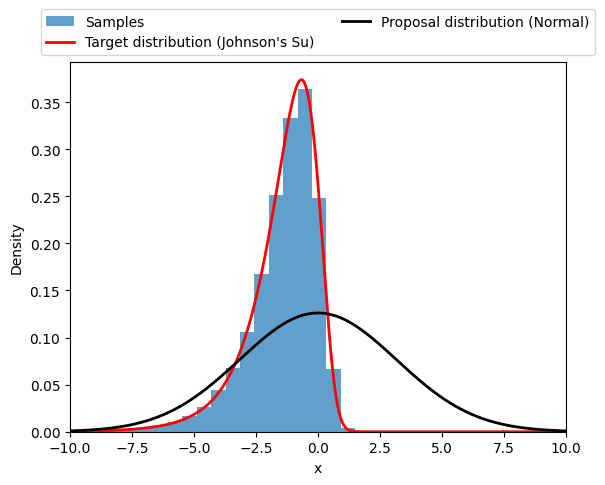

In [9]:
#Q5

def q_x(x,mean,variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-0.5 * (x - mean) ** 2 / variance)

L = 100000 #change sample size here
mean = 0
variance = 10
std = np.sqrt(variance)
samples = np.random.normal(mean, std, L)

weights = Johnsons_Su_distribution(samples) / q_x(samples,mean,variance)
weights = weights / np.sum(weights)
n_bins = 50
plt.hist(samples,weights=weights,bins=n_bins,density=True,alpha=0.7,label='Samples')

x = np.linspace(-10, 10, 1000)
plt.plot(x, Johnsons_Su_distribution(x), color = 'r',lw=2,label='Target distribution (Johnson\'s Su)')
plt.plot(x, q_x(x,mean,variance), color = 'k',lw=2,label='Proposal distribution (Normal)')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)
plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylabel('Density')
plt.savefig(f'Q4_L={L}.png')




In [10]:
# Q5 average over 1000 runs
n_runs = 1000

variances = np.zeros(n_runs)
means = np.zeros(n_runs)
for i in range(n_runs):
    L = 500000 #change sample size here
    mean = 0
    variance = 10
    std = np.sqrt(variance)
    samples = np.random.normal(mean, std, L)

    weights = Johnsons_Su_distribution(samples) / q_x(samples,mean,variance)
    weights = weights / np.sum(weights)

    mean = np.sum(samples * weights)/np.sum(weights)
    variance = np.sum(weights * (samples - mean) ** 2) / np.sum(weights)
    means[i] = mean
    variances[i] = variance

print(f'L = {L}, Mean: {np.mean(means)}, Variance: {np.mean(variances)}')
print('variance of the mean:',np.var(means),'variance of the variance:',np.var(variances))

L = 500000, Mean: -1.4127098940530196, Variance: 1.974742874833205
variance of the mean: 6.303205229701574e-06 variance of the variance: 0.0005797340702088047


L = 1000, Mean: -1.228593695669758, Variance: 1.1218177140304448


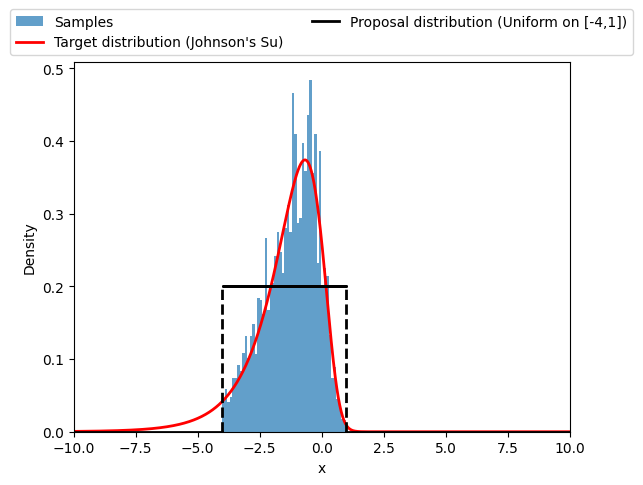

In [11]:
#Q5

def q_x_uniform(x): # Uniform proposal distribution on the interval [−4, 1].
    return 1 / 5 * np.ones_like(x)

L = 1000 #change sample size here
samples = np.random.uniform(-4, 1, L)

weights = Johnsons_Su_distribution(samples) / q_x_uniform(samples)
weights = weights / np.sum(weights)
n_bins = 50
plt.hist(samples,weights=weights,bins=n_bins,density=True,alpha=0.7,label='Samples')

x = np.linspace(-10, 10, 1000)
plt.plot(x, Johnsons_Su_distribution(x), color = 'r',lw=2,label='Target distribution (Johnson\'s Su)')

for i in range(len(x)):
    if x[i] < -4 or x[i] > 1:
        x[i] = 0
    else:
        x[i] = x[i]
plt.plot(x, q_x_uniform(x), color = 'k',lw=2,label='Proposal distribution (Uniform on [-4,1])')
plt.plot([-10, -4], [0, 0], color = 'k',lw=2)
plt.plot([1, 10], [0, 0], color = 'k',lw=2)
plt.plot([-4, -4], [0, 0.2], color = 'k',linestyle = '--',lw=2)
plt.plot([1, 1], [0, 0.2], color = 'k',linestyle = '--',lw=2)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)
plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylabel('Density')
plt.savefig(f'Q6_L={L}.png')

mean = np.sum(samples * weights)/np.sum(weights)
variance = np.sum(weights * (samples - mean) ** 2) / np.sum(weights)
print(f'L = {L}, Mean: {mean}, Variance: {variance}')




In [15]:
def q_x_uniform(x): # Uniform proposal distribution on the interval [−4, 1].
    return 1 / 5 * np.ones_like(x)

n_runs = 100000
variances = np.zeros(n_runs)
means = np.zeros(n_runs)

L = 1000 #change sample size here

for i in range(n_runs):
    samples = np.random.uniform(-4, 1, L)

    weights = Johnsons_Su_distribution(samples) / q_x_uniform(samples)
    weights = weights / np.sum(weights)

    mean = np.sum(samples * weights)/np.sum(weights)
    variance = np.sum(weights * (samples - mean) ** 2) / np.sum(weights)
    means[i] = mean
    variances[i] = variance
print(f'L = {L}, Mean: {mean}, Variance: {variance}')
print('variance of the mean:',np.var(means),'variance of the variance:',np.var(variances))


L = 1000, Mean: -1.172995539755588, Variance: 1.084784822113917
variance of the mean: 0.0009008230636726823 variance of the variance: 0.0013201947670947666


TypeError: q_x() missing 2 required positional arguments: 'mean' and 'variance'

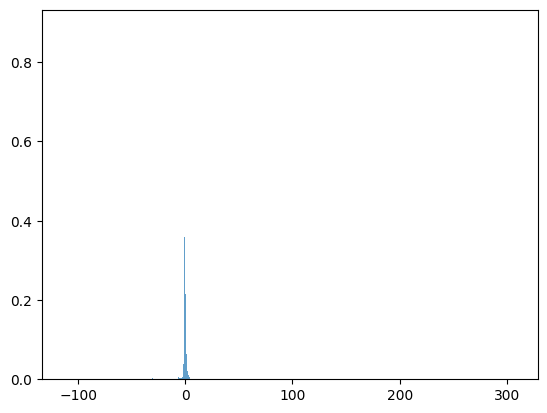

In [ ]:
# # Which one should be used in 1?
# # this one?
# samples = np.random.normal(0, 1, L)
# # samples = np.random.uniform(-5, 5, L)

# weights = Johnsons_Su_distribution(samples) / samples
# plt.hist(weights, bins=800,density=True,alpha=0.7,label='weights')
 
# #  ---------------------------------------------------------------------

# # or this one?
# samples = np.random.normal(0, 1, L)

# weights = Johnsons_Su_distribution(samples) / q_x(samples)

# normalized_weights = weights / np.sum(weights)

# plt.hist(samples, bins=50, weights=normalized_weights, density=True, alpha=0.6, label='Weighted Samples')
# # Problems with this one: if L increases --> nothing really happens with the histogram.
# # The histrogrem does not follow the normal distribution more tightly. It always have the peak.


# # Normalize weights?